In [ ]:
!pip install geopy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import category_encoders as ce
from sklearn import preprocessing

# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split

# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [2]:
hotels_train = pd.read_csv('data/hotels_train.csv')
hotels_train.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [3]:
hotels_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [4]:
hotels_test = pd.read_csv('data/hotels_test.csv')
hotels_test.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520
3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day,45.479888,9.196298
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,"[' Business trip ', ' Solo traveler ', ' Class...",444 day,52.370545,4.888644


In [5]:
hotels_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [6]:
# объединяем оба датасета в один
hotels_train['sample'] = 1 # помечаем обучающий датасет
hotels_test['sample'] = 0 # помечаем тестовый датасет
hotels_test['reviewer_score'] = 0 # в тестовом датасете нет значения reviewer_score - его необходимо предсказать,
                                  # поэтому просто заполняем его нулями

hotels = pd.concat([hotels_train, hotels_test], sort=False, ignore_index=True, axis=0) # объединяем

In [7]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [8]:
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,sample
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,1
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540,1
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060,1


# --------------------------------------------------------------------

In [88]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts',
            'review_total_positive_word_counts', 'additional_number_of_scoring']

# категориальные признаки
cat_cols = ['average_score', 'lat', 'total_number_of_reviews_reviewer_has_given'] #lng - невозможно добавить, 
                                                                                  #т.к. присутствуют отрицательные значения

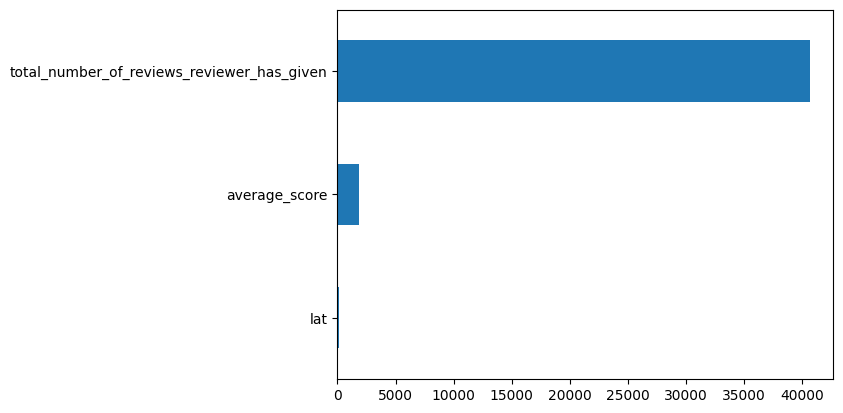

In [89]:
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh');

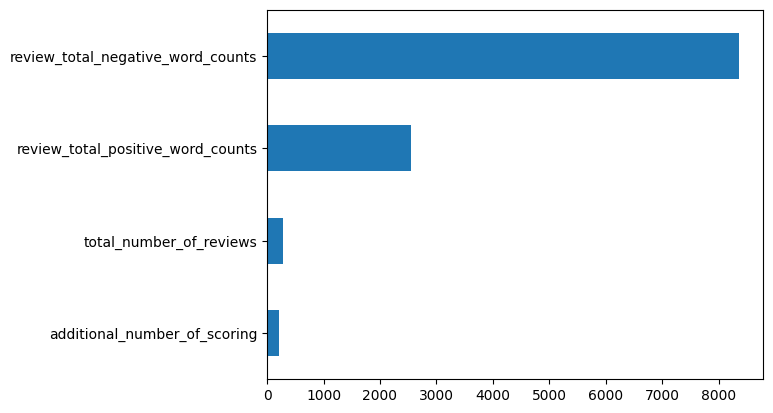

In [90]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh');

In [9]:
# def address(string):
#     if ' '.join(string.split()[-2:]) == 'United Kingdom':
#         return string.split()[-3:]
#     else:
#         return string.split()[-2:]
    
hotels['hotel_address_city_country'] = hotels['hotel_address'].apply(lambda x: ' '.join(x.split()[-2:]))
hotels['days_since_review'] = hotels['days_since_review'].apply(lambda x: int(x.split()[0]))
hotels['review_date'] = pd.to_datetime(hotels['review_date'], format='%m/%d/%Y')

In [10]:
# найдем пропущенные широту и долготу для отелей через специальную библиотеку

from geopy.geocoders import Nominatim #Подключаем библиотеку

geolocator = Nominatim(user_agent="Tester") #Указываем название приложения (так нужно, да)
def address_location(address):
    location = geolocator.geocode(address) #Создаем переменную, которая состоит из нужного нам адреса
    return (location.latitude, location.longitude)

In [12]:
hotels['location'] = hotels[['hotel_address_city_country', 'lat', 'lng']].apply(
    lambda x: address_location(x['hotel_address_city_country']) if math.isnan(x['lat']) else (x['lat'], x['lng']), axis = 1)

In [13]:
hotels['lat'] = hotels['lat'].fillna(hotels['location'].apply(lambda x: x[0]))
hotels['lng'] = hotels['lng'].fillna(hotels['location'].apply(lambda x: x[1]))

In [14]:
def season(date):
    if date.month in (1, 2, 12):
        return 'winter'
    elif date.month in (3, 4, 5):
        return 'spring'
    elif date.month in (6, 7, 8):
        return 'summer'
    else:
        return 'autumn'

hotels['review_date_season'] = hotels['review_date'].apply(lambda x: season(x))

In [15]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 21 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [16]:
def remove_symbols(string):
    trans_table = {ord('[') : None, ord(']') : None}
    return string.translate(trans_table)


hotels['tags'] = hotels['tags'].apply(lambda x: remove_symbols(x))
hotels['tags'] = hotels['tags'].apply(lambda x: x.split(", "))
hotels['tags_qty'] = hotels['tags'].apply(lambda x: len(x))
hotels['tag_1'] = hotels['tags'].apply(lambda x: x[0])

In [17]:
print(hotels['reviewer_nationality'].nunique())
print(hotels['review_date_season'].nunique())
print(hotels['hotel_name'].nunique())
print(hotels['tag_1'].nunique())

227
4
1492
9


In [18]:
print(hotels['review_total_negative_word_counts'].nunique())
print(hotels['additional_number_of_scoring'].nunique())
print(hotels['review_total_negative_word_counts'].nunique())
print(hotels['total_number_of_reviews_reviewer_has_given'].nunique())
print(hotels['days_since_review'].nunique())
print(hotels['tags_qty'].nunique())
print(hotels['total_number_of_reviews'].nunique())

402
480
402
198
731
6
1142


In [ ]:
# def nationality_count(qty):
#     if qty >= 100000:
#         return 1
#     elif qty >= 10000 and qty < 100000:
#         return 2
#     elif qty >= 1000 and qty < 10000:
#         return 3
#     elif qty >= 100 and qty < 1000:
#         return 4
#     else:
#         return 5

# n = hotels_2['reviewer_nationality'].value_counts().reset_index()
# n['reviewer_nationality_code'] = n['reviewer_nationality'].apply(lambda x: nationality_count(x))

In [19]:
hotels['reviewer_nationality_code'] = ce.OrdinalEncoder().fit_transform(hotels['reviewer_nationality'])
hotels = pd.get_dummies(hotels, columns=['review_date_season'])
# hotels = pd.concat([hotels, ce.OneHotEncoder(cols=['review_date_season'], use_cat_names=True).fit_transform(
#     hotels['review_date_season'])], axis=1)
hotels = pd.concat([hotels, ce.BinaryEncoder(cols=['hotel_name']).fit_transform(hotels['hotel_name'])], axis = 1)
hotels = pd.get_dummies(hotels, columns=['tag_1'])

In [18]:
# hotels = hotels.explode('tags')
# hotels = pd.concat([hotels, ce.BinaryEncoder(cols=['tags']).fit_transform(hotels['tags'])], axis = 1)

In [20]:
object_columns = [s for s in hotels.columns if (hotels[s].dtypes == 'object' or hotels[s].dtypes == 'datetime64[ns]')]
hotels.drop(object_columns, axis = 1, inplace=True)

In [21]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 37 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   reviewer_score                              515738 non-null  float64
 7   days_since_review                           515738 non-null  int64  
 8   lat                                         515738 non-null  float64
 9   lng                                         515738 non-null  float64
 

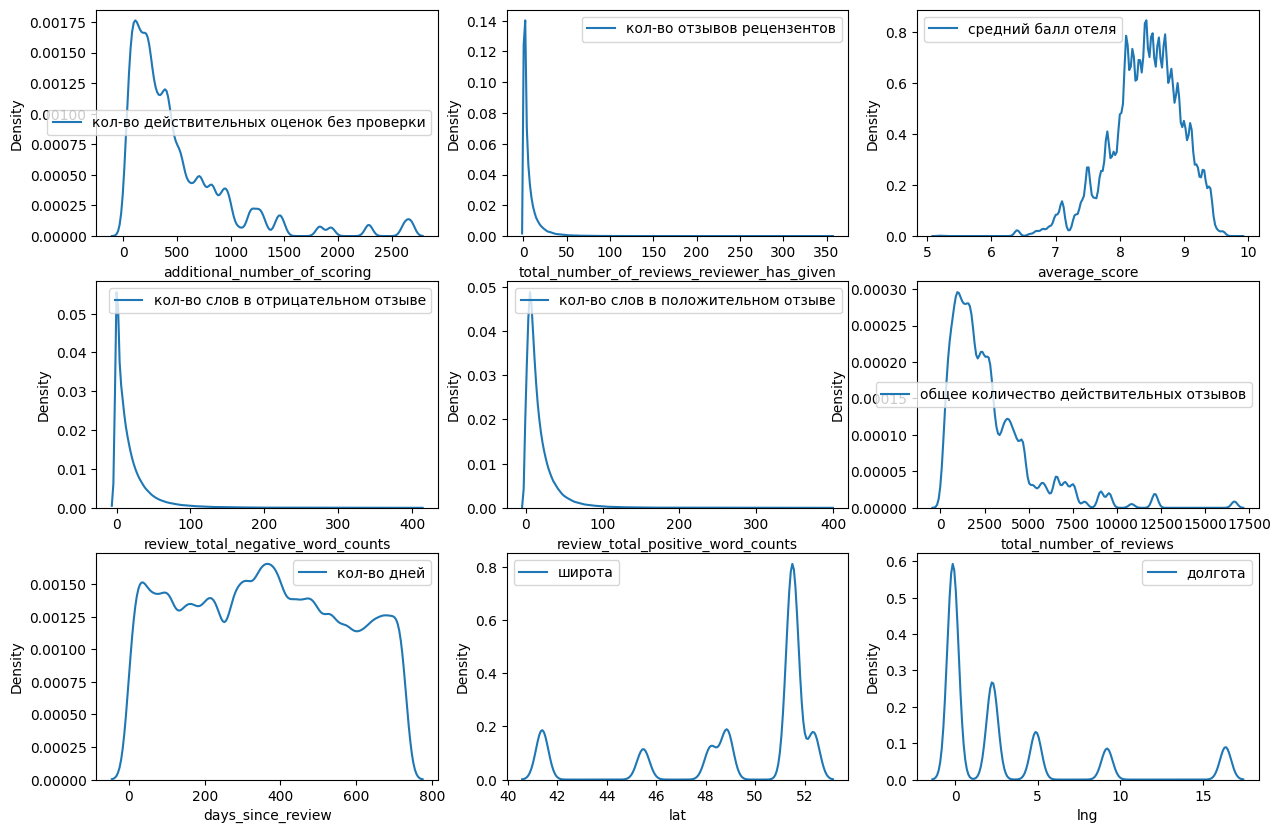

In [22]:
# Рассмотрим распределения на графиках
# hotels = hotels.reset_index().drop(['index'], axis = 1) 

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))
# axs.set_title('Исходные распределения')

ax1 = plt.subplot(3, 3, 1)
sns.kdeplot(hotels['additional_number_of_scoring'], ax=ax1, label ='кол-во действительных оценок без проверки')
plt.legend()

ax2 = plt.subplot(3, 3, 2)
sns.kdeplot(hotels['total_number_of_reviews_reviewer_has_given'], ax=ax2, label ='кол-во отзывов рецензентов')
plt.legend()

ax3 = plt.subplot(3, 3, 3)
sns.kdeplot(hotels['average_score'], ax=ax3, label ='средний балл отеля')
plt.legend()

ax4 = plt.subplot(3, 3, 4)
sns.kdeplot(hotels['review_total_negative_word_counts'], ax=ax4, label ='кол-во слов в отрицательном отзыве')
plt.legend()

ax5 = plt.subplot(3, 3, 5)
sns.kdeplot(hotels['review_total_positive_word_counts'], ax=ax5, label ='кол-во слов в положительном отзыве')
plt.legend()

ax6 = plt.subplot(3, 3, 6)
sns.kdeplot(hotels['total_number_of_reviews'], ax=ax6, label ='общее количество действительных отзывов')
plt.legend()

ax7 = plt.subplot(3, 3, 7)
sns.kdeplot(hotels['days_since_review'], ax=ax7, label ='кол-во дней')
plt.legend()

ax8 = plt.subplot(3, 3, 8)
sns.kdeplot(hotels['lat'], ax=ax8, label ='широта')
plt.legend()

ax9 = plt.subplot(3, 3, 9)
sns.kdeplot(hotels['lng'], ax=ax9, label ='долгота')
plt.legend();

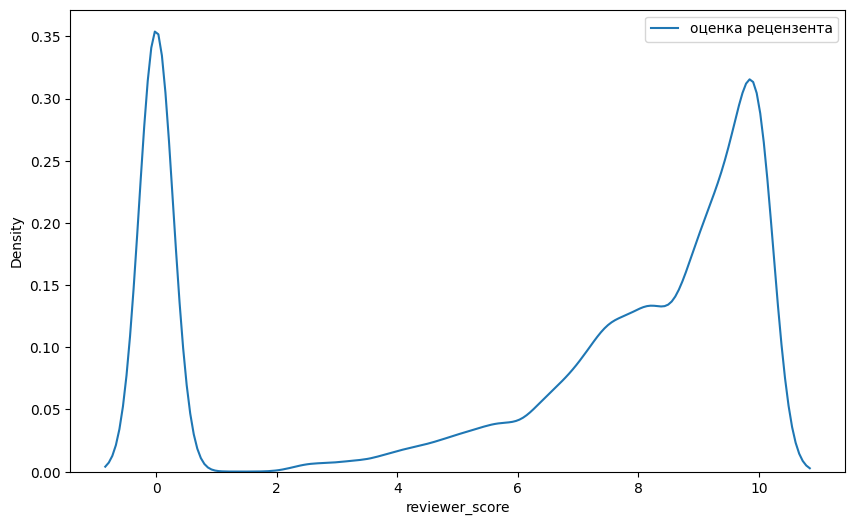

In [23]:
fig, ax10 = plt.subplots(ncols=1, figsize=(10, 6))
sns.kdeplot(hotels['reviewer_score'], ax=ax10, label ='оценка рецензента')
plt.legend();

In [24]:
hotels[['additional_number_of_scoring', 'total_number_of_reviews_reviewer_has_given', 'average_score',
       'review_total_negative_word_counts', 'review_total_positive_word_counts', 'total_number_of_reviews',
       'days_since_review', 'lat', 'lng', 'reviewer_score']].describe()

,additional_number_of_scoring,total_number_of_reviews_reviewer_has_given,average_score,review_total_negative_word_counts,review_total_positive_word_counts,total_number_of_reviews,days_since_review,lat,lng,reviewer_score
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,498.081836,7.166001,8.397487,18.539450,17.776458,2743.743944,354.441932,49.432357,2.893570,6.297672
std,500.538467,11.040228,0.548048,29.690831,21.804185,2317.464868,208.928124,3.460262,4.667683,3.902295
min,1.000000,1.000000,5.200000,0.000000,0.000000,43.000000,0.000000,41.328376,-0.369758,0.000000
25%,169.000000,1.000000,8.100000,2.000000,5.000000,1161.000000,175.000000,48.213305,-0.143372,0.625000
50%,341.000000,3.000000,8.400000,9.000000,11.000000,2134.000000,353.000000,51.499981,0.019886,7.900000
75%,660.000000,8.000000,8.800000,23.000000,22.000000,3613.000000,527.000000,51.516288,4.841163,9.600000
max,2682.000000,355.000000,9.800000,408.000000,395.000000,16670.000000,730.000000,52.400181,16.429233,10.000000


In [25]:
hotels_2 = hotels

In [26]:
col_names = list(hotels_2[['additional_number_of_scoring', 'total_number_of_reviews_reviewer_has_given', 'average_score',
       'review_total_negative_word_counts', 'review_total_positive_word_counts', 'total_number_of_reviews',
       'days_since_review', 'lat', 'lng']])

In [27]:
# т.к. признаки распределены ненормально, то сперва их нормализуем

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
hotels_3 = r_scaler.fit_transform(hotels_2[['additional_number_of_scoring', 'total_number_of_reviews_reviewer_has_given', 
                                            'average_score', 'review_total_negative_word_counts', 
                                            'review_total_positive_word_counts', 'total_number_of_reviews',
                                            'days_since_review', 'lat', 'lng']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
hotels_3 = pd.DataFrame(hotels_3, columns = col_names)

In [28]:
hotels_3.describe()

,additional_number_of_scoring,total_number_of_reviews_reviewer_has_given,average_score,review_total_negative_word_counts,review_total_positive_word_counts,total_number_of_reviews,days_since_review,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,0.319922,0.595143,-0.003590,0.454260,0.398615,0.248672,0.004096,-0.625987,0.576520
std,1.019427,1.577175,0.782926,1.413849,1.282599,0.945132,0.593546,1.047617,0.936433
min,-0.692464,-0.285714,-4.571429,-0.428571,-0.647059,-0.852773,-1.002841,-3.079521,-0.078171
25%,-0.350305,-0.285714,-0.428571,-0.333333,-0.352941,-0.396819,-0.505682,-0.995063,-0.032753
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.649695,0.714286,0.571429,0.666667,0.647059,0.603181,0.494318,0.004937,0.967247
max,4.767821,50.285714,2.000000,19.000000,22.588235,5.928222,1.071023,0.272542,3.292052


In [29]:
# после нормализации стандартизируем их

# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
hotels_4 = s_scaler.fit_transform(hotels_3)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
hotels_4 = pd.DataFrame(hotels_4, columns = col_names)

In [30]:
hotels_4.describe()

,additional_number_of_scoring,total_number_of_reviews_reviewer_has_given,average_score,review_total_negative_word_counts,review_total_positive_word_counts,total_number_of_reviews,days_since_review,lat,lng
count,5.157380e+05,5.157380e+05,5.157380e+05,5.157380e+05,5.157380e+05,5.157380e+05,5.157380e+05,5.157380e+05,5.157380e+05
mean,-3.067333e-17,-1.500960e-16,-1.907867e-16,3.705689e-16,-6.114344e-17,-7.361625e-17,-1.533575e-17,2.434926e-16,1.694581e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-9.930951e-01,-5.585036e-01,-5.834323e+00,-6.244173e-01,-8.152781e-01,-1.165388e+00,-1.696479e+00,-2.342016e+00,-6.991331e-01
25%,-6.574563e-01,-5.585036e-01,-5.428121e-01,-5.570564e-01,-5.859641e-01,-6.829642e-01,-8.588700e-01,-3.523009e-01,-6.506323e-01
50%,-3.138260e-01,-3.773477e-01,4.585546e-03,-3.212931e-01,-3.107873e-01,-2.631084e-01,-6.901575e-03,5.975344e-01,-6.156561e-01
75%,3.234883e-01,7.554191e-02,7.344491e-01,1.502334e-01,1.937034e-01,3.750896e-01,8.259215e-01,6.022472e-01,4.172509e-01
max,4.363142e+00,3.150608e+01,2.559108e+00,1.311721e+01,1.730053e+01,6.009269e+00,1.797548e+00,8.576885e-01,2.899871e+00


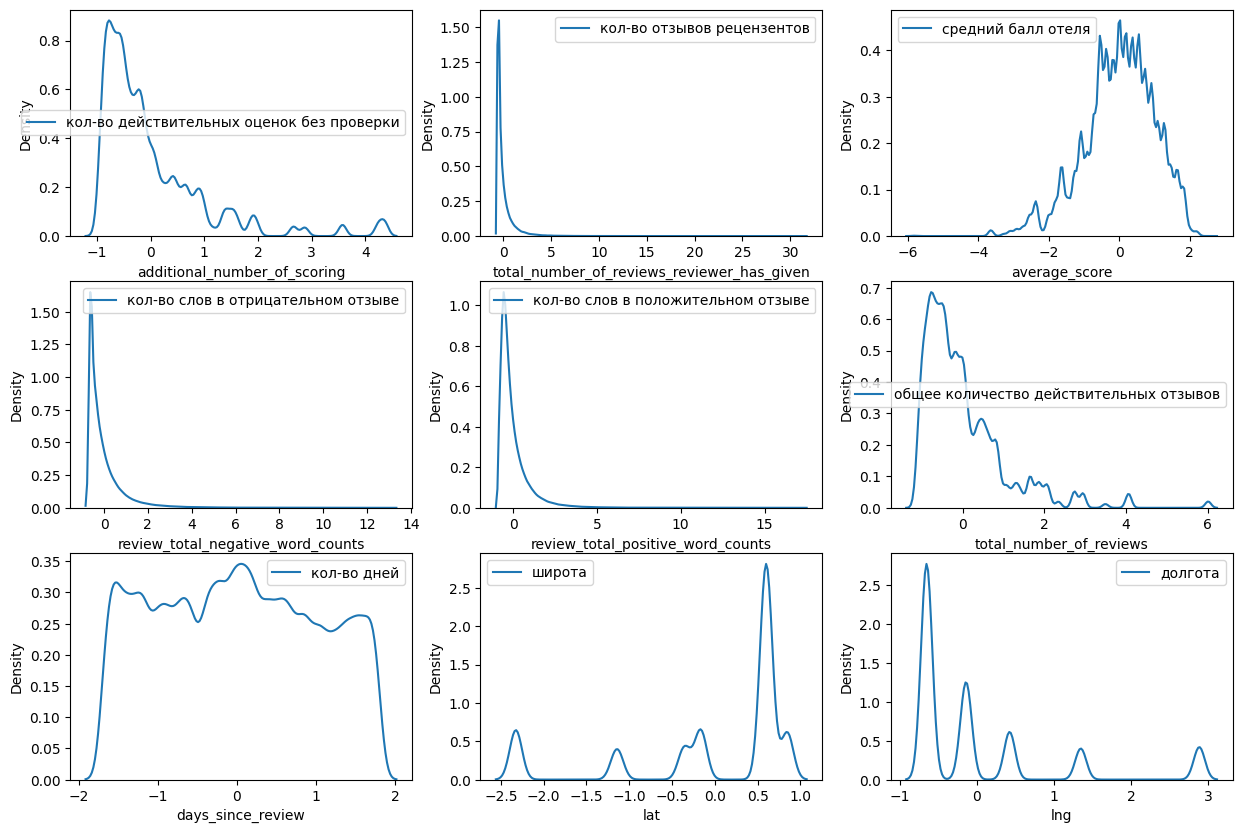

In [31]:
fig_2, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))
# axs.set_title('Исходные распределения')

ax10 = plt.subplot(3, 3, 1)
sns.kdeplot(hotels_4['additional_number_of_scoring'], ax=ax10, label ='кол-во действительных оценок без проверки')
plt.legend()

ax11 = plt.subplot(3, 3, 2)
sns.kdeplot(hotels_4['total_number_of_reviews_reviewer_has_given'], ax=ax11, label ='кол-во отзывов рецензентов')
plt.legend()

ax12 = plt.subplot(3, 3, 3)
sns.kdeplot(hotels_4['average_score'], ax=ax12, label ='средний балл отеля')
plt.legend()

ax13 = plt.subplot(3, 3, 4)
sns.kdeplot(hotels_4['review_total_negative_word_counts'], ax=ax13, label ='кол-во слов в отрицательном отзыве')
plt.legend()

ax14 = plt.subplot(3, 3, 5)
sns.kdeplot(hotels_4['review_total_positive_word_counts'], ax=ax14, label ='кол-во слов в положительном отзыве')
plt.legend()

ax15 = plt.subplot(3, 3, 6)
sns.kdeplot(hotels_4['total_number_of_reviews'], ax=ax15, label ='общее количество действительных отзывов')
plt.legend()

ax16 = plt.subplot(3, 3, 7)
sns.kdeplot(hotels_4['days_since_review'], ax=ax16, label ='кол-во дней')
plt.legend()

ax17 = plt.subplot(3, 3, 8)
sns.kdeplot(hotels_4['lat'], ax=ax17, label ='широта')
plt.legend()

ax18 = plt.subplot(3, 3, 9)
sns.kdeplot(hotels_4['lng'], ax=ax18, label ='долгота')
plt.legend();

**нормализация и стандартизация не помогли**

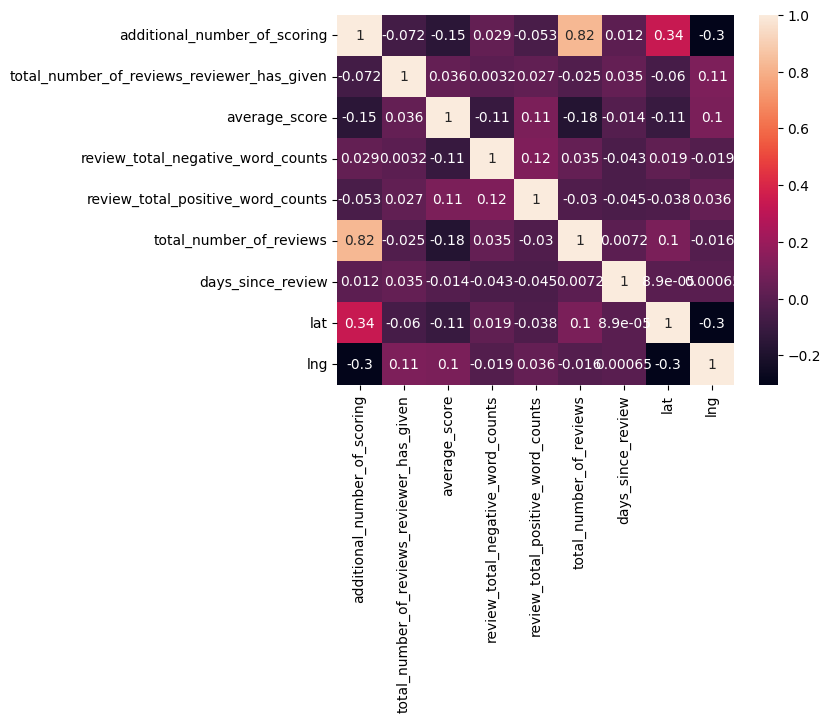

In [32]:
# теперь проверим мультиколлениарность признаков
sns.heatmap(hotels_4.corr(), annot=True);

мы видимо, что коррелируют 2 признака - *общее количество действительных отзывов об отеле* и *количество действительных оценок без проверки*, поэтому, по моему мнению, второй признак можно удалить и оставить только **общее количество действительных отзывов об отеле**

In [33]:
hotels = hotels.drop(['additional_number_of_scoring'], axis = 1)

In [34]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 36 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               515738 non-null  float64
 1   review_total_negative_word_counts           515738 non-null  int64  
 2   total_number_of_reviews                     515738 non-null  int64  
 3   review_total_positive_word_counts           515738 non-null  int64  
 4   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 5   reviewer_score                              515738 non-null  float64
 6   days_since_review                           515738 non-null  int64  
 7   lat                                         515738 non-null  float64
 8   lng                                         515738 non-null  float64
 9   sample                                      515738 non-null  int64  
 

In [35]:
# Теперь выделим тестовую часть
train_data = hotels.query('sample == 1').drop(['sample'], axis=1)
test_data = hotels.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [23]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
# X = hotels.drop(['reviewer_score'], axis = 1)
# y = hotels['reviewer_score']

In [36]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)

In [38]:
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

In [40]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку
# предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13591660910283102


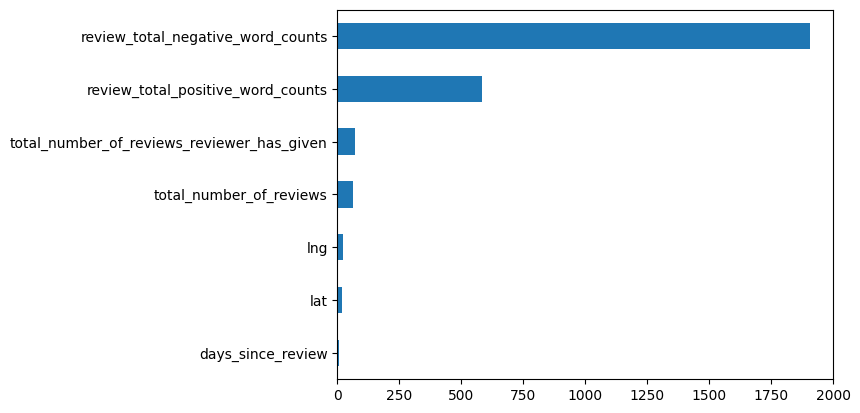

In [41]:
# оценим непрерывные признаки
from sklearn.feature_selection import f_classif

num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts', 'lat', 'lng', 'days_since_review',
            'total_number_of_reviews_reviewer_has_given']

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh');

видим, что из непрерывных признаков наибольшую значимость имеет общее количество слов в отрицательном отзыв

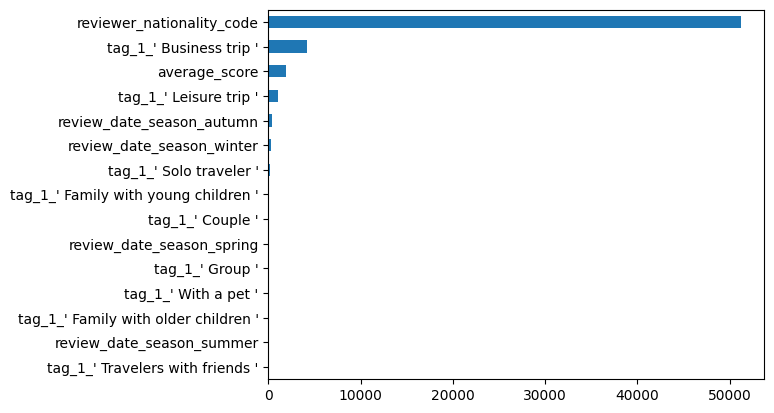

In [42]:
# оценим категориальные признаки
from sklearn.feature_selection import chi2

y = y.astype('int')
cat_cols = ['average_score', "tag_1_' Couple '", 'reviewer_nationality_code', 'review_date_season_autumn', 'review_date_season_spring', 'review_date_season_summer',
           'review_date_season_winter', "tag_1_' Family with older children '", "tag_1_' Family with young children '", "tag_1_' Group '",
           "tag_1_' Leisure trip '", "tag_1_' Solo traveler '", "tag_1_' Travelers with friends '", "tag_1_' With a pet '", "tag_1_' Business trip '"]

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index = cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh');

видим, что из категориальных признаков наибольшую значимость имеет страна рецензента